# sEMG Data Preprocessing for Keystroke Prediction

This notebook will guide you through the steps of loading and preprocessing sEMG data from the Meta Reality Labs `emg2qwerty` dataset.

## 1. Import Libraries

We'll start by importing the necessary libraries for data manipulation and visualization.



In [14]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import h5py
import glob
import sys
import os
from emg2qwerty.transforms import ToTensor, Lambda,Compose
# Now import the classes from data.py in the emg2qwerty directory
from emg2qwerty.data import EMGSessionData, WindowedEMGDataset, LabelData




## 2. Load the Data

The dataset is stored in HDF5 format. We'll load it and inspect its structure.

```python

```

In [15]:
folder_path = "data/"

# Get all the HDF5 files in the folder
hdf5_files = glob.glob(os.path.join(folder_path, "*.hdf5"))

# Bandpass filter parameters
low_cutoff = 20  # Hz
high_cutoff = 500  # Hz
sampling_rate = 2000  # Hz

# Create a bandpass filter
def bandpass_filter(data, low_cutoff, high_cutoff, sampling_rate):
    nyquist = 0.5 * sampling_rate
    low = low_cutoff / nyquist
    high = high_cutoff / nyquist
    b, a = butter(4, [low, high], btype='band')
    return filtfilt(b, a, data, axis=0)

# Normalize each channel to zero mean and unit variance
def normalize_data(data: np.ndarray) -> np.ndarray:
    # Example: Normalize each field (EMG data) to have mean 0 and std 1
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Build your transformations using the available classes
train_transform = Compose([
    ToTensor(fields=("emg_left", "emg_right")),      # Convert EMG data to tensor
    Lambda(lambd=normalize_data),                    # Normalize the data
])



## 3. Preprocess the sEMG Signals

Next, we will apply filtering and normalization to preprocess the sEMG signals.

### 3.1. Bandpass Filtering

We'll use a bandpass filter to remove noise and artifacts.

Processing file: data/2021-06-04-1622861066-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5
EMG Window: tensor([[[-6.2686e+00, -4.4730e+00, -1.0814e+01,  ..., -6.3937e+00,
          -6.6854e+00, -7.1111e+00],
         [ 2.3822e+01,  2.3805e+01,  2.9016e+01,  ...,  2.1572e+01,
           2.2697e+01,  1.6361e+01]],

        [[-6.2978e+00, -5.0227e+00, -1.1969e+01,  ..., -6.3767e+00,
          -7.9997e+00, -5.9827e+00],
         [ 1.6346e+01,  1.4293e+01,  1.7384e+01,  ...,  9.6441e+00,
           1.0224e+01,  9.8781e+00]],

        [[-3.8899e+00, -6.3799e+00, -1.2373e+01,  ..., -6.1463e+00,
          -5.3400e+00, -6.0941e+00],
         [ 4.3524e+00,  6.4912e+00,  7.8449e+00,  ..., -4.0800e+00,
          -6.1667e-01,  2.3409e+00]],

        ...,

        [[-1.1135e+00, -2.6704e-01,  1.0140e+00,  ..., -4.1014e+00,
          -5.2067e+00, -5.1024e+00],
         [ 4.7114e-01,  1.0844e+00,  2.6050e-01,  ...,  5.8197e-01,
           1.0622e-02,  2.4106e+00]],

        [[-2.8148

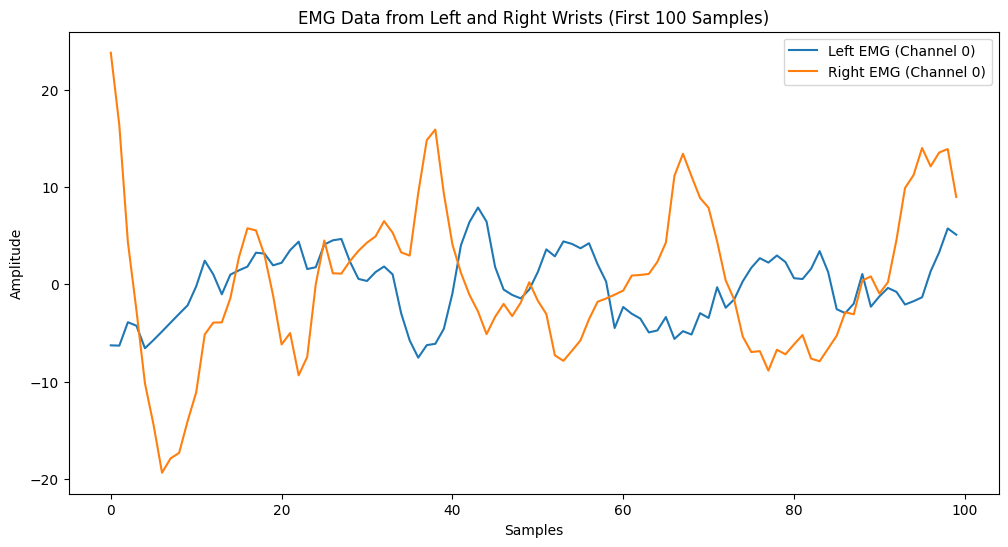

Processing file: data/2021-07-22-1627003020-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5
EMG Window: tensor([[[ 1.5515e+01,  1.5515e+01,  2.6598e+01,  ...,  1.5515e+01,
           1.7732e+01,  1.4407e+01],
         [-1.1464e+01, -8.5129e+00, -1.2483e+01,  ..., -5.8844e+00,
          -5.3182e+00, -3.4056e+00]],

        [[ 1.1530e+01,  1.0422e+01,  1.7867e+01,  ...,  1.0422e+01,
           1.3019e+01,  9.6777e+00],
         [-8.6064e+00, -1.0993e+01, -1.2952e+01,  ..., -4.4574e+00,
          -6.8730e+00, -1.0347e+00]],

        [[ 6.9259e+00,  6.1815e+00,  1.1705e+01,  ...,  7.2897e+00,
           7.8090e+00,  7.9565e+00],
         [-9.6463e+00, -1.0229e+01, -1.2861e+01,  ..., -5.5645e+00,
          -7.8384e+00, -2.7106e+00]],

        ...,

        [[-1.5844e+00,  3.4379e-03, -9.9825e-01,  ...,  6.1546e+00,
           1.1588e+01,  3.8096e+00],
         [ 1.3673e+01,  2.3025e+01,  7.9289e+00,  ...,  4.7741e+00,
           7.0951e+00,  5.6802e+00]],

        [[-1.3215

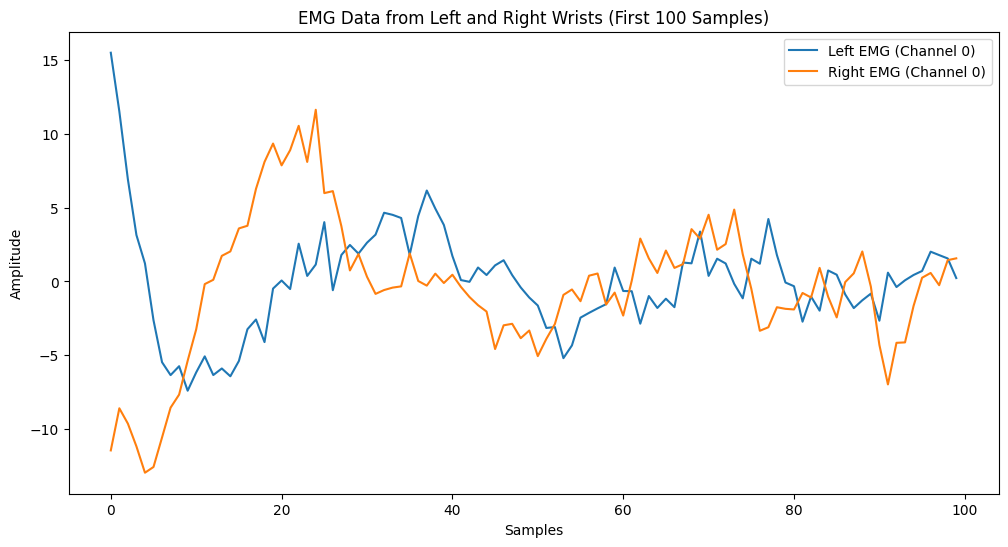

Processing file: data/2021-07-21-1626916256-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5
EMG Window: tensor([[[ 13.2990,  13.2990,  27.7062,  ...,  17.7320,  18.8402,  16.6237],
         [-13.6347, -14.0679, -11.8767,  ..., -13.4440,  -8.8992,  -7.2158]],

        [[ 10.0416,  10.0416,  17.5028,  ...,  13.0193,  14.8720,  11.1666],
         [-11.7316, -11.9929, -10.4067,  ..., -11.7764,  -8.3265,  -5.2623]],

        [[  8.2594,   7.1511,  10.2939,  ...,  10.0255,   8.9950,   8.8395],
         [ -9.9308,  -8.9467, -10.0836,  ...,  -7.8840,  -7.5991,  -2.5469]],

        ...,

        [[  4.1946,   1.2896,   0.6154,  ...,  -5.4214,  -2.9139,   0.2316],
         [ -5.2837,   0.3554,   1.6209,  ...,  -7.6400, -11.2945,  -8.6773]],

        [[ -0.8713,  -3.0350,   0.2111,  ...,  -8.8567,  -9.4017,  -4.7694],
         [ -6.7736,  -2.1569,  -1.0779,  ..., -11.6870, -15.0803, -14.2379]],

        [[ -1.2111,  -1.6330,   0.9859,  ...,  -7.6205,  -7.0271,  -3.7495],
        

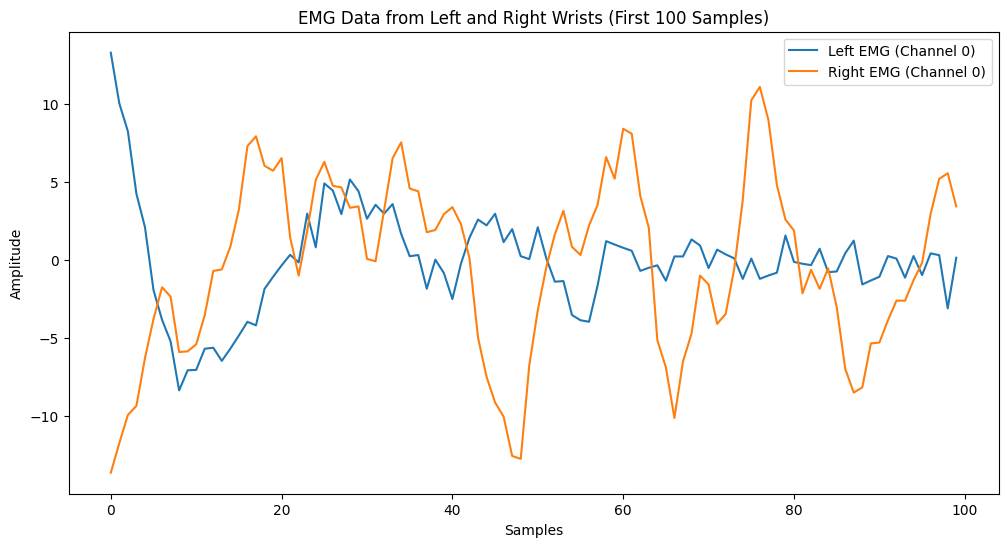

Processing file: data/2021-07-21-1626917264-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5
EMG Window: tensor([[[ 16.6237,  14.4072,  26.5979,  ...,  16.6237,  18.8402,  16.6237],
         [-12.6385, -14.7297, -13.6584,  ..., -12.4720, -11.0286,  -8.7932]],

        [[ 10.0584,  10.7860,  16.7584,  ...,  12.2749,  13.7638,  10.0584],
         [-13.5739, -15.0921, -13.9578,  ...,  -9.7235,  -9.0535,  -7.6121]],

        [[  5.8786,   6.4844,  12.0689,  ...,   5.1510,   8.2505,   5.8786],
         [-13.8537, -14.8847, -12.6334,  ..., -10.7565, -10.7092,  -8.7525]],

        ...,

        [[ -3.9033,  -5.9141,  -3.7976,  ...,  -6.0198,  -7.3944,  -0.5019],
         [ 16.7906,   6.1021,   3.0106,  ...,   3.8663,  22.5566,  30.9391]],

        [[ -6.5354,  -5.3866,  -7.1339,  ...,  -6.8360,  -7.2688,  -2.8313],
         [ 15.0779,   3.9834,   1.2790,  ...,   4.7808,  27.1448,  41.7964]],

        [[ -7.0956,  -7.0309,  -5.9373,  ...,  -6.1841,  -5.9546,  -5.6645],
        

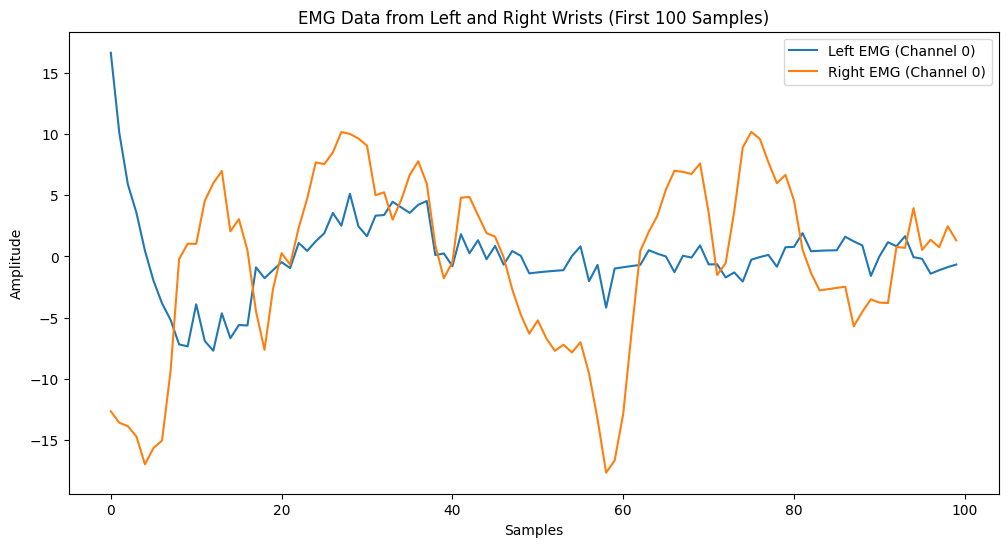

Processing file: data/2021-06-05-1622885888-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5
EMG Window: tensor([[[15.5155, 14.4072, 27.7062,  ..., 15.5155, 18.8402, 16.6237],
         [-4.7663, -4.8614, -7.7633,  ...,  3.6343,  4.0057,  4.1890]],

        [[ 9.3139,  9.6777, 17.5028,  ..., 11.5304, 11.5473, 10.0584],
         [-4.7663, -4.8614, -7.7633,  ...,  3.6343,  4.0057,  4.1890]],

        [[ 7.6535,  5.7400, 11.4022,  ...,  6.9259,  8.9782,  6.9868],
         [-6.4401, -5.5960, -9.4037,  ...,  1.3832,  3.3360,  2.5243]],

        ...,

        [[-7.9443, -6.4372, -7.1886,  ..., -3.2296, -7.2383, -5.0844],
         [ 4.6599, -0.3404, -3.1594,  ...,  0.7502,  4.9561, 12.3900]],

        [[-9.6071, -8.2689, -7.5335,  ..., -2.6813, -3.6750, -6.5746],
         [ 3.6239,  0.8171, -1.7758,  ...,  1.3740,  2.8340,  8.8846]],

        [[-5.9383, -6.9841, -5.1954,  ..., -1.0805, -3.2020, -2.9479],
         [ 3.9734,  2.8616, -0.6060,  ..., -0.5151,  2.3183, 10.6061]]])
L

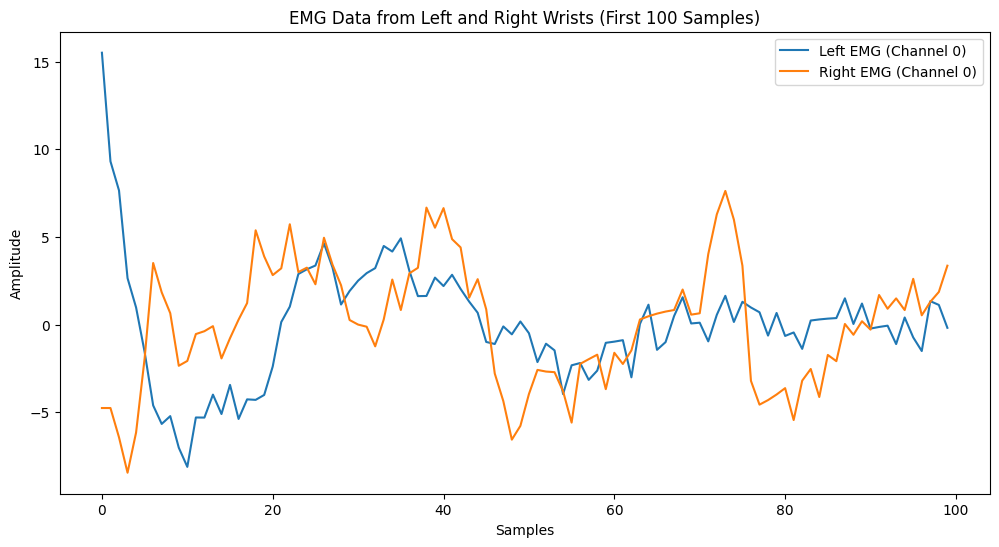

Processing file: data/2021-06-02-1622682789-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5
EMG Window: tensor([[[ -3.6697,  -5.3813,  -6.4962,  ...,  -3.8643,  -6.3722,  -6.4299],
         [ 15.6501,  19.7193,  24.1859,  ...,   9.6946,   9.3139,   5.9555]],

        [[ -5.9604,  -7.2201, -10.9084,  ...,  -6.4266,  -8.7586,  -5.8106],
         [ 10.2162,   9.5663,  13.3238,  ...,   5.5757,   4.3288,   4.6405]],

        [[ -6.3763,  -8.3611, -11.6427,  ...,  -8.1507, -10.2848,  -7.4673],
         [  4.5026,   3.7872,   6.8002,  ...,   2.2111,   3.7379,   3.3998]],

        ...,

        [[ 16.7687,  15.0797,  13.5608,  ...,  12.8076,  13.8542,  17.1792],
         [ -1.8947,  -0.5419,  -0.3383,  ...,  -2.5784,  -1.3502,  -0.9552]],

        [[ 18.9661,  18.7390,  19.3973,  ...,  13.3668,  16.2802,  19.0434],
         [ -2.2483,  -2.7023,  -1.5402,  ...,  -3.1384,  -2.2465,  -1.4961]],

        [[ 19.8358,  19.5634,  24.0368,  ...,  13.3133,  17.4041,  20.7661],
        

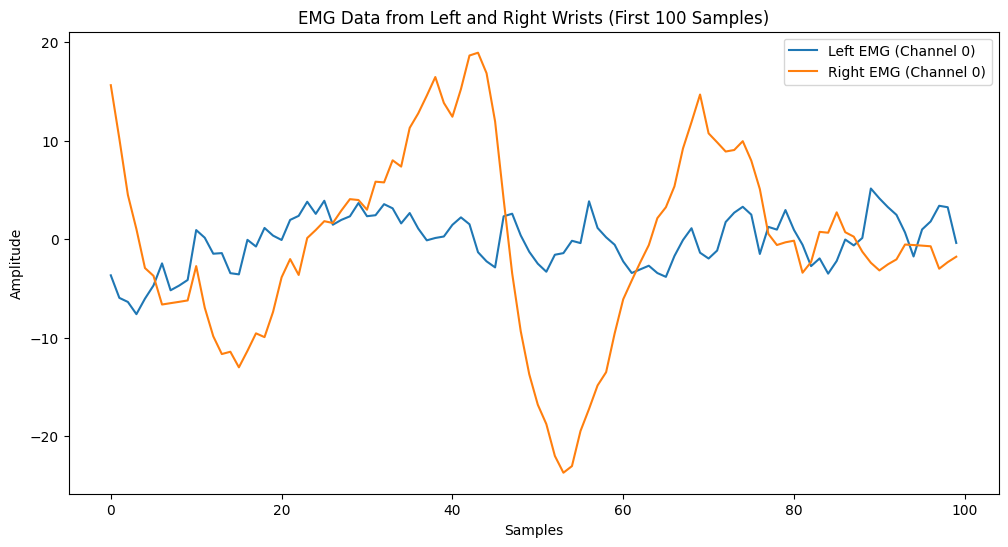

Processing file: data/2021-06-05-1622889105-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5
EMG Window: tensor([[[ 14.4072,  13.2990,  26.5979,  ...,  17.7320,  19.9484,  14.4072],
         [-10.6665, -10.1421,  -8.7130,  ...,  -2.9849,  -6.9267,  -8.6918]],

        [[ 10.7860,  10.0416,  16.7584,  ...,  11.9111,  12.2917,  11.8942],
         [-10.6665, -10.1421,  -8.7130,  ...,  -2.9849,  -6.9267,  -8.6918]],

        [[  6.4844,   7.1511,   9.8524,  ...,   9.2811,   7.2032,   7.2288],
         [ -6.7533,  -8.0450,  -9.4440,  ...,   9.4339,   1.3550,  -1.6760]],

        ...,

        [[ 14.7082,  18.9558,  26.8399,  ...,   6.4104,   9.6846,  12.7432],
         [  3.5258,   3.4576,   4.2792,  ...,  -0.3842,   0.2468,  -0.3449]],

        [[ 11.9677,  14.1756,  21.8717,  ...,   7.8847,   6.9540,   9.1761],
         [  1.6934,   2.0558,   4.0220,  ...,  -1.5976,  -2.9335,  -3.2453]],

        [[  9.4653,  11.2113,  17.3352,  ...,   5.2906,   8.0148,   6.1915],
        

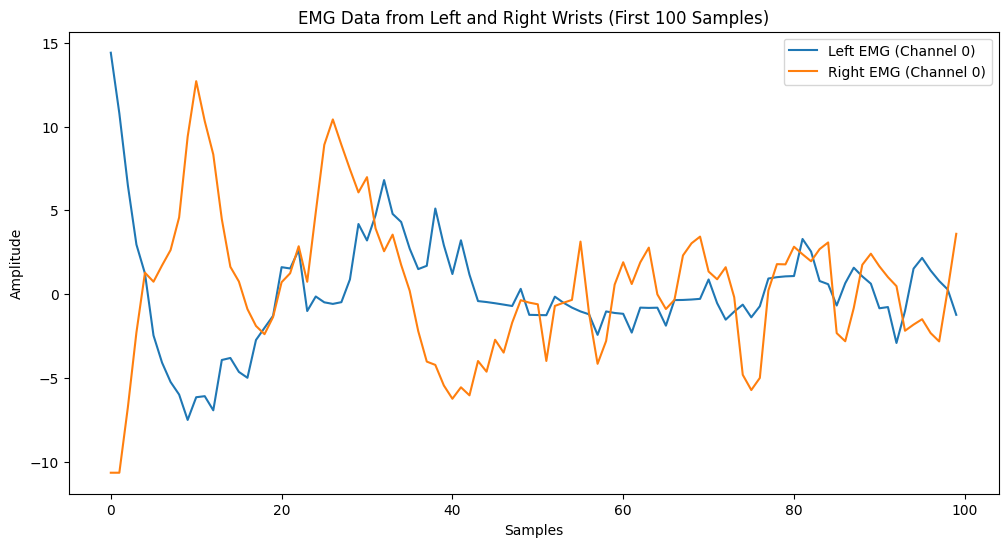

Processing file: data/2021-06-04-1622862148-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5
EMG Window: tensor([[[ 15.5155,  14.4072,  25.4897,  ...,  15.5155,  17.7320,  17.7320],
         [  3.5158,   6.4538,   4.7383,  ...,   3.6896,   3.6062,   2.6057]],

        [[ 11.5304,   9.6777,  17.1222,  ...,  11.5304,  14.1276,  11.9111],
         [  3.5158,   6.4538,   4.7383,  ...,   3.6896,   3.6062,   2.6057]],

        [[  6.9259,   6.8482,  11.2636,  ...,   5.8177,   7.4452,   7.0646],
         [  5.7010,   4.2144,   5.1054,  ...,   5.5297,   6.7003,   4.3050]],

        ...,

        [[ -8.2727,  -5.1686,  -8.7443,  ..., -12.5563, -14.7613, -14.1108],
         [  1.3783,   1.5091,   1.5809,  ...,  10.6886,   7.0875,   1.6395]],

        [[  9.6046,   6.9429,   1.3097,  ...,   2.9543,   1.6608,   6.7496],
         [  5.3413,   4.3904,   3.2852,  ...,  18.7684,   8.2291,   4.1583]],

        [[ 20.6546,  13.6778,   7.7530,  ...,  10.0579,  16.3974,  22.4683],
        

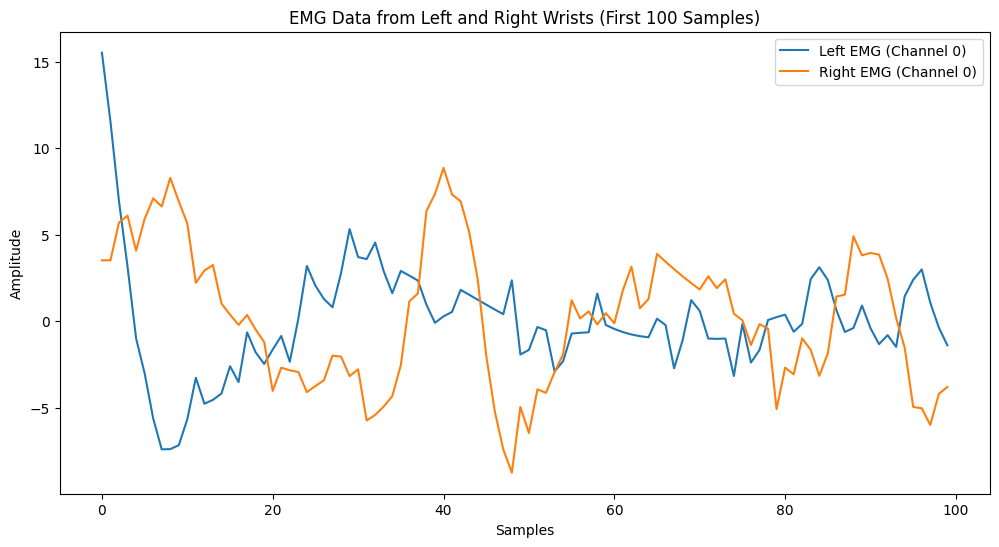

Processing file: data/2021-07-22-1627001995-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5
EMG Window: tensor([[[14.4072, 14.4072, 29.9227,  ..., 12.1907, 18.8402, 15.5155],
         [ 1.9395,  6.8086, -5.6391,  ...,  5.8436,  2.5022,  9.6423]],

        [[ 7.4612,  8.5695, 18.9917,  ...,  8.1889,  9.3308,  8.2057],
         [ 1.9395,  6.8086, -5.6391,  ...,  5.8436,  2.5022,  9.6423]],

        [[ 5.3593,  4.9955, 10.0688,  ...,  4.8569,  6.3810,  6.9091],
         [ 2.9919,  3.9107, -7.2011,  ..., -0.0964,  0.3967,  7.9454]],

        ...,

        [[ 2.6903,  3.8869,  1.0958,  ...,  1.7857,  1.8389,  6.7038],
         [ 1.0509,  2.6127,  0.1734,  ..., -2.7978, -0.6003,  0.0627]],

        [[ 2.8580,  3.9361,  3.2850,  ...,  0.8336,  1.9784,  8.6186],
         [ 2.9725,  1.8196,  1.8635,  ..., -0.1290,  2.8375,  1.5872]],

        [[ 0.6069,  1.5604,  2.5151,  ...,  2.2505,  1.9107,  7.2889],
         [ 4.2868,  3.3843,  1.9220,  ...,  0.8517,  5.3386,  3.8212]]])
L

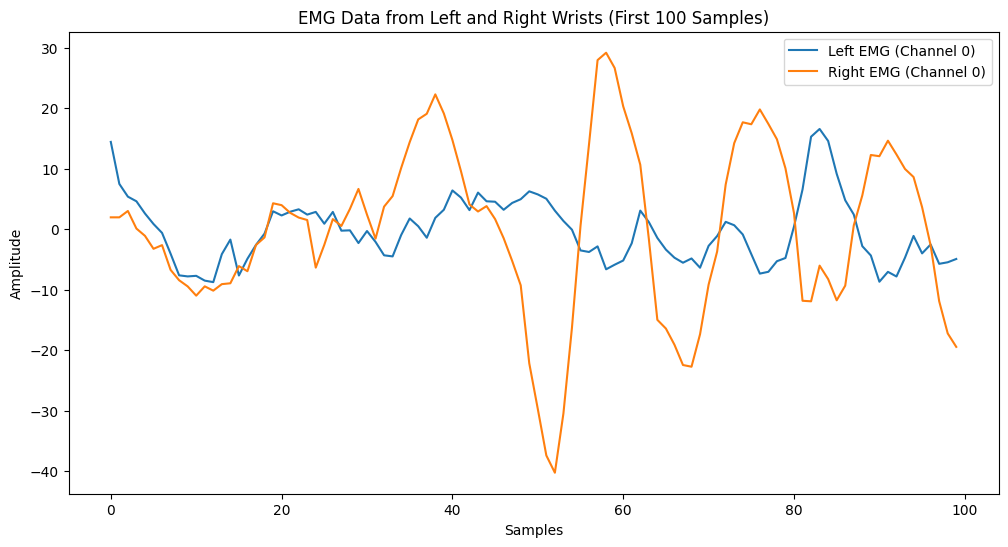

Processing file: data/2021-06-02-1622679967-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5
EMG Window: tensor([[[ 16.6237,  16.6237,  26.5979,  ...,  17.7320,  21.0567,  16.6237],
         [ -7.8443,  -8.2971,  -5.5582,  ...,  -5.6477, -10.0809,  -7.1542]],

        [[ 10.0584,   8.9501,  17.8666,  ...,  11.9111,  11.9279,  12.2749],
         [-13.0640, -12.1598, -11.9406,  ..., -12.6628, -19.8835, -15.1732]],

        [[  6.9868,   6.2424,  11.7051,  ...,   7.0646,   9.1168,   8.4757],
         [-17.7152, -15.8667, -14.2001,  ..., -16.3310, -23.0487, -16.0520]],

        ...,

        [[  5.1884,   5.6337,   5.6766,  ...,   3.3087,   6.2077,   5.5872],
         [  6.2269,   9.6580,   7.6443,  ...,  -4.2398,  -5.9982,   1.5783]],

        [[  1.1726,   0.4063,  -0.7989,  ...,   1.5892,   2.3182,   1.5977],
         [ -1.4654,   4.6015,   1.2762,  ..., -12.2594, -15.5089, -10.4441]],

        [[ -2.9167,  -0.0856,  -3.2540,  ...,   1.4302,   2.7484,   0.8539],
        

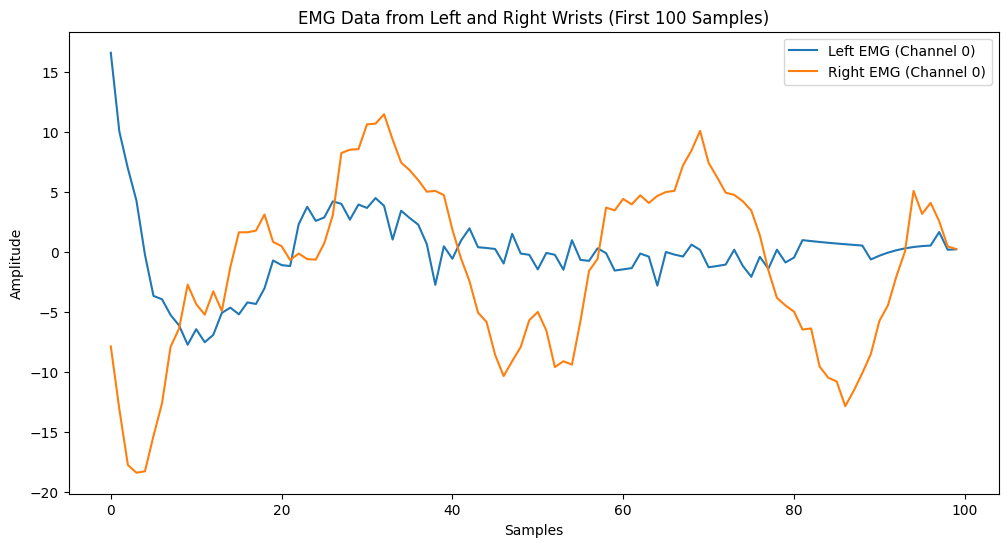

Processing file: data/2021-06-03-1622764398-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5
EMG Window: tensor([[[ 1.2191e+01,  1.1082e+01,  2.1057e+01,  ...,  1.5515e+01,
           1.7732e+01,  1.2191e+01],
         [ 1.0718e+01,  1.1048e+01,  9.9931e+00,  ...,  3.5590e+01,
           2.2289e+01,  1.2272e+01]],

        [[ 9.2971e+00,  8.5527e+00,  1.5253e+01,  ...,  1.0422e+01,
           9.6946e+00,  9.2971e+00],
         [ 5.8772e+00,  8.4494e+00,  9.3568e+00,  ...,  2.1823e+01,
           1.0695e+01,  4.0359e+00]],

        [[ 5.6013e+00,  6.2680e+00,  1.0242e+01,  ...,  6.1815e+00,
           7.7922e+00,  7.8178e+00],
         [ 3.2131e+00,  4.0811e+00,  6.4274e+00,  ...,  9.3410e+00,
          -7.9824e-01, -3.5501e+00]],

        ...,

        [[ 7.0727e-01, -1.0098e+00, -2.2041e-01,  ...,  7.4828e-04,
           2.6369e+00,  5.6739e-01],
         [-1.7649e+00,  2.0784e+00, -1.3154e+00,  ..., -4.6384e+00,
          -4.9432e+00, -8.8372e-01]],

        [[ 5.7986

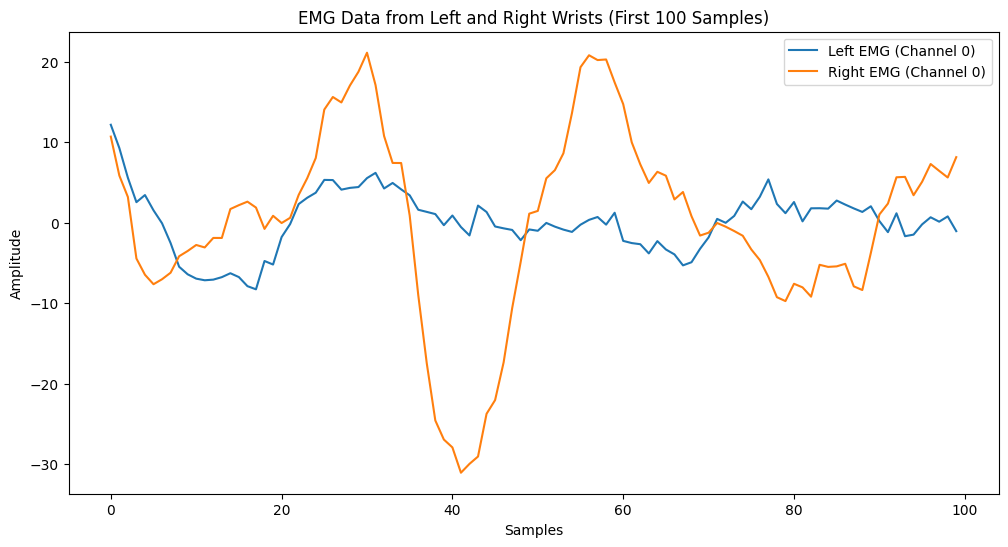

Processing file: data/2021-06-05-1622884635-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5
EMG Window: tensor([[[ 1.5515e+01,  1.4407e+01,  2.4381e+01,  ...,  1.1082e+01,
           1.4407e+01,  1.4407e+01],
         [-9.9729e+00, -1.0791e+01, -1.2347e+01,  ..., -1.8539e+00,
          -5.6056e+00, -3.6378e+00]],

        [[ 9.3139e+00,  8.5695e+00,  1.6378e+01,  ...,  7.4444e+00,
           1.0786e+01,  8.5695e+00],
         [-9.9729e+00, -1.0791e+01, -1.2347e+01,  ..., -1.8539e+00,
          -5.6056e+00, -3.6378e+00]],

        [[ 7.6535e+00,  4.9955e+00,  1.1930e+01,  ...,  8.8483e+00,
           8.7009e+00,  8.3203e+00],
         [-9.7786e+00, -1.0266e+01, -1.2074e+01,  ..., -4.4458e+00,
          -9.1368e+00, -5.5646e+00]],

        ...,

        [[ 1.9796e+00,  3.4586e+00,  6.3778e-01,  ...,  3.6860e+00,
           3.8157e+00,  1.8557e+00],
         [-6.5546e-01, -2.6393e+00, -3.7139e+00,  ..., -4.0561e+00,
          -4.5743e+00, -4.7893e+00]],

        [[ 2.3912

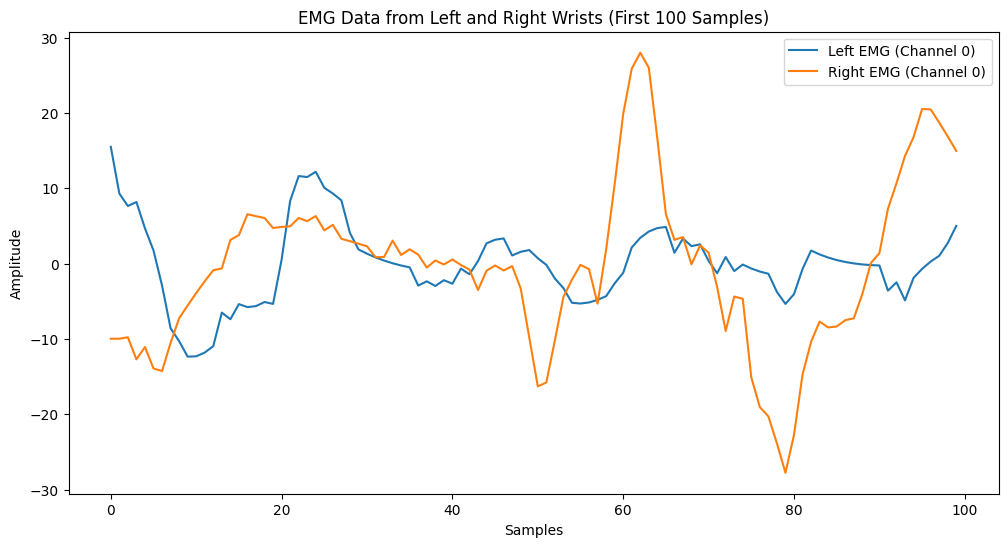

Processing file: data/2021-06-03-1622765527-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5
EMG Window: tensor([[[-2.5051, -3.1113, -6.1522,  ..., -1.7501, -4.8958, -2.4708],
         [19.3723, 22.7139, 22.7139,  ..., 12.6555, 15.2695,  8.5695]],

        [[-2.1632, -2.6549, -4.8555,  ..., -1.4483, -2.5983, -1.1493],
         [14.6404, 17.8177, 14.4929,  ...,  9.7226, 12.2941,  8.3203]],

        [[-2.8557, -2.1353, -3.5568,  ...,  0.0277, -1.8236, -1.1938],
         [ 9.1749, 10.9410, 10.9241,  ...,  6.9929,  8.2627, 10.9553]],

        ...,

        [[-0.8343, -2.3523, -2.6709,  ..., -3.0563, -2.0499,  0.6118],
         [-4.9460, -1.2219, -1.1180,  ..., -6.9088, -6.1820, -9.6342]],

        [[-0.8898, -0.9532, -0.9193,  ..., -0.6594, -1.3891,  1.6821],
         [-6.1994, -2.3194, -2.1036,  ..., -3.7556, -5.4025, -9.2233]],

        [[ 3.5065,  1.1716,  4.8157,  ...,  2.2409,  1.3668,  1.2691],
         [-2.4067, -0.8200,  0.5984,  ..., -0.1833, -2.3357, -6.2584]]])
L

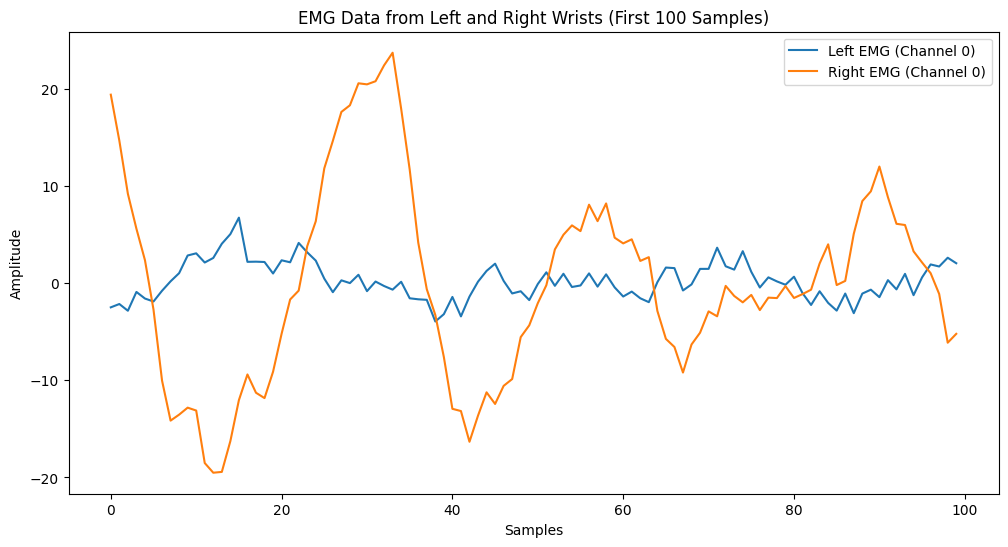

Processing file: data/2021-07-22-1627004019-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5
EMG Window: tensor([[[ 1.2639e+01,  8.5695e+00,  1.7122e+01,  ...,  1.0803e+01,
           1.2656e+01,  1.1911e+01],
         [ 2.9923e+01,  2.8814e+01,  3.5464e+01,  ...,  2.9923e+01,
           2.6598e+01,  1.5515e+01]],

        [[ 7.6704e+00,  4.9955e+00,  1.1264e+01,  ...,  6.3201e+00,
           9.7226e+00,  7.0646e+00],
         [ 1.7883e+01,  1.7139e+01,  2.1606e+01,  ...,  2.1208e+01,
           1.7867e+01,  1.1530e+01]],

        [[ 2.4822e+00,  3.1807e+00,  4.0840e+00,  ...,  3.7608e+00,
           4.7764e+00,  1.9859e+00],
         [ 1.7082e+01,  1.6641e+01,  1.7073e+01,  ...,  1.4882e+01,
           1.3922e+01,  1.1359e+01]],

        ...,

        [[-6.2817e-01, -4.2581e+00, -7.5161e+00,  ..., -1.5239e+01,
          -1.3124e+01,  8.6714e+00],
         [ 3.1002e-01, -1.1684e+00, -1.2194e+00,  ...,  2.4325e-02,
          -9.9104e-01, -1.5380e+00]],

        [[-5.7209

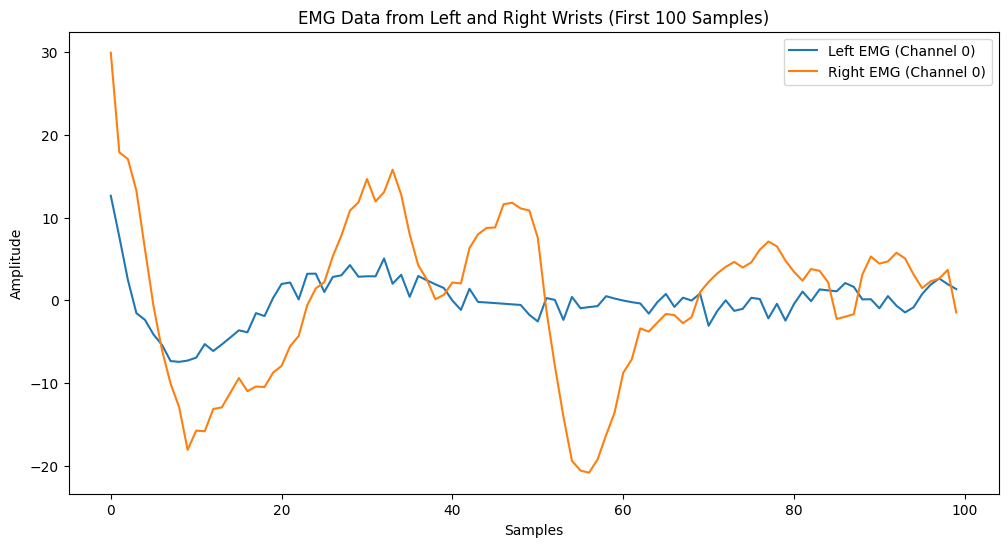

Processing file: data/2021-06-02-1622681518-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5
EMG Window: tensor([[[ 19.9484,  17.7320,  28.8144,  ...,  18.8402,  23.2732,  18.8402],
         [ -7.0286,  -7.6536, -12.1282,  ...,  -8.9724,  -8.8943,  -3.1835]],

        [[ 11.1835,  10.8028,  18.2472,  ...,  11.5473,  14.5250,  11.5473],
         [ -7.0286,  -7.6536, -12.1282,  ...,  -8.9724,  -8.8943,  -3.1835]],

        [[  6.4588,   5.2119,   9.6272,  ...,   5.6534,   7.4196,   6.7617],
         [ -6.7874,  -8.7464, -12.6778,  ...,  -5.7807,  -5.9515,   1.3165]],

        ...,

        [[ -4.3314,  -2.3709,  -3.2207,  ...,   0.1894,   0.1408,   0.9734],
         [ -2.0053,  -1.2285,  -1.9377,  ...,   2.2062,  -0.6942,  -1.7159]],

        [[ -1.2618,  -0.8219,  -2.2046,  ...,   1.3054,   1.1375,  -0.6620],
         [ -0.7275,  -3.8899,  -0.2139,  ...,   0.2831,  -2.3855,  -4.5279]],

        [[ -2.4539,  -2.0113,  -1.4605,  ...,  -0.1648,   0.6796,  -0.7184],
        

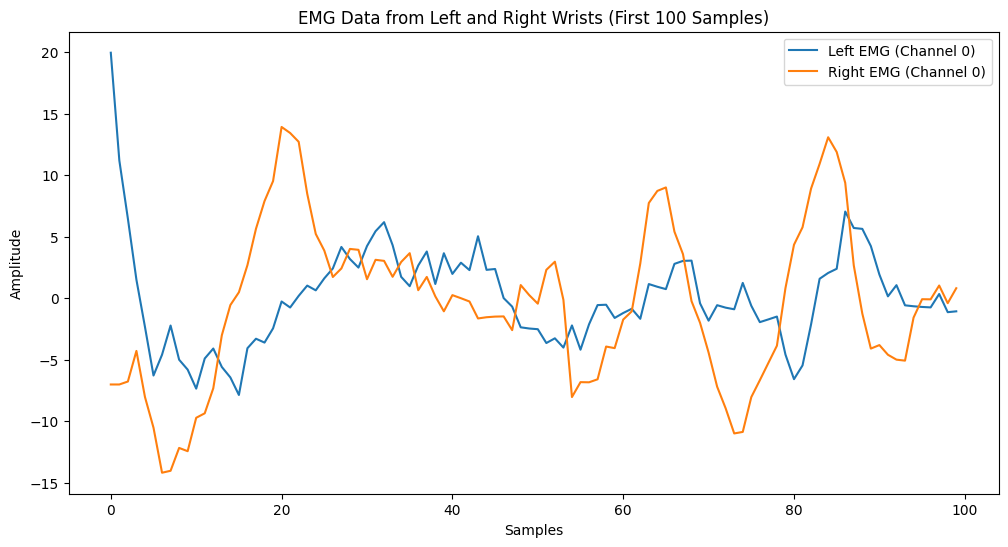

Processing file: data/2021-06-04-1622863166-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5
EMG Window: tensor([[[ 8.8660,  8.8660, 22.1649,  ..., 14.4072, 17.7320, 13.2990],
         [ 4.7703, 11.1770, 10.9518,  ...,  8.0863, 10.2330,  7.6447]],

        [[ 9.2803,  5.9555, 17.1053,  ...,  9.6777, 13.0193,  7.8251],
         [ 0.6065,  2.5633,  5.5304,  ...,  3.4261,  5.4465,  3.2327]],

        [[ 6.8739,  3.5323,  9.2113,  ...,  6.8482,  6.7008,  5.6622],
         [-1.4669, -1.8398, -0.0597,  ..., -3.6348, -2.9685, -2.5207]],

        ...,

        [[-0.5222,  0.4963, -1.4948,  ...,  4.5532,  4.1655,  1.7033],
         [-0.8479, -0.7623, -0.9348,  ..., -3.1043, -2.0058,  0.6341]],

        [[-2.6549, -3.6037, -3.2274,  ...,  0.2176, -0.2011, -1.6217],
         [-1.9209,  0.2931,  0.2999,  ..., -2.5179, -3.0437, -2.0523]],

        [[-1.8571, -3.1020, -2.1030,  ..., -0.7829, -3.4345, -2.9008],
         [-2.6060, -1.1891, -1.0446,  ..., -3.0586, -1.4136, -1.6857]]])
L

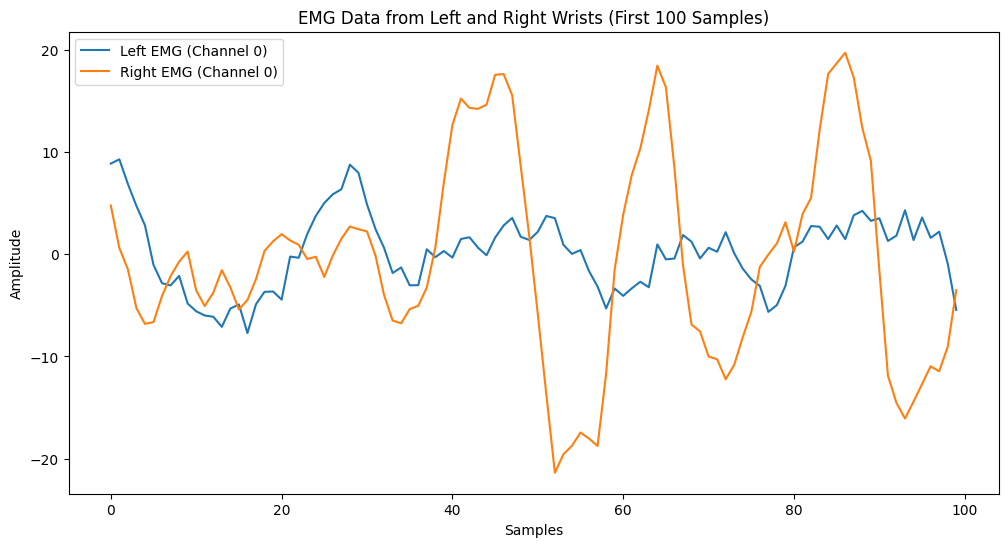

Processing file: data/2021-06-03-1622766673-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5
EMG Window: tensor([[[14.4072, 15.5155, 26.5979,  ..., 15.5155, 17.7320, 14.4072],
         [ 5.6418,  3.5630,  4.3138,  ...,  1.5623,  4.1329,  0.7058]],

        [[ 9.6777,  8.2057, 15.6501,  ..., 10.4222, 10.8028,  9.6777],
         [ 5.6418,  3.5630,  4.3138,  ...,  1.5623,  4.1329,  0.7058]],

        [[ 5.7400,  5.8009,  7.9997,  ...,  5.0732,  5.2119,  6.8482],
         [ 2.5601,  3.4192,  4.2005,  ...,  2.8625,  4.9666,  2.8303]],

        ...,

        [[ 7.1182,  4.6565,  1.4908,  ..., 14.4080, 20.4049, 13.7252],
         [ 1.5787, -0.2317,  0.5544,  ...,  0.0328, -0.1402,  1.1476]],

        [[ 6.1076,  3.8996,  2.7332,  ..., 11.5217, 17.3102, 11.8116],
         [-0.5481, -1.9144,  0.6559,  ...,  0.4277, -1.7394,  0.4399]],

        [[ 4.0615,  3.2174,  3.5484,  ..., 13.4976, 16.6534, 11.1204],
         [ 0.1984,  0.3138, -0.4045,  ..., -0.3972,  0.5533,  1.0610]]])
L

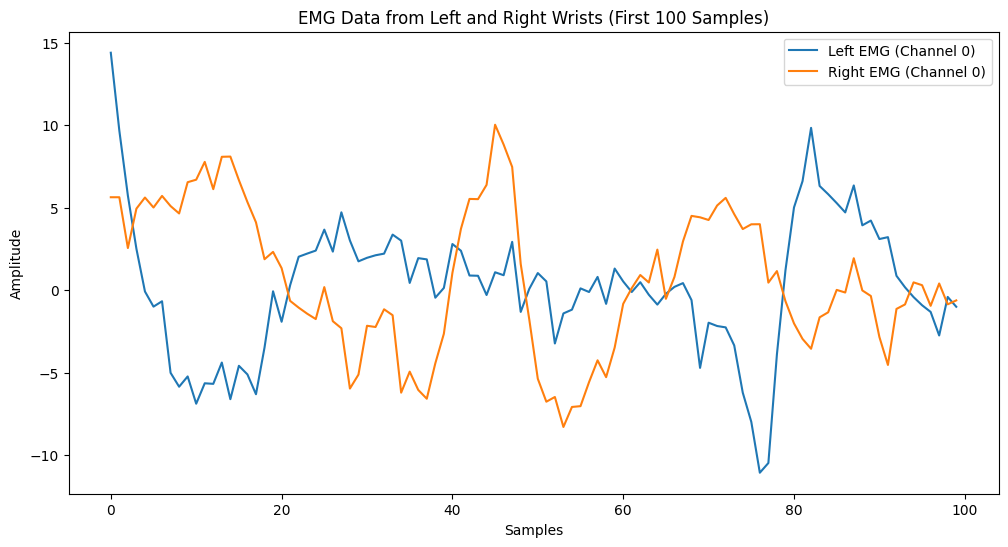

Processing file: data/2021-07-21-1626915176-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5
EMG Window: tensor([[[15.5155, 17.7320, 26.5979,  ..., 16.6237, 21.0567, 17.7320],
         [11.9215, 12.8911, 14.9433,  ...,  6.7617,  8.4669,  5.6013]],

        [[10.4222,  9.6946, 16.7584,  ..., 11.1666, 13.0361, 11.9111],
         [11.9215, 12.8911, 14.9433,  ...,  6.7617,  8.4669,  5.6013]],

        [[ 6.1815,  5.5757, 10.9607,  ...,  7.7313,  7.6447,  7.0646],
         [ 5.2213,  1.5876,  6.0983,  ...,  1.7377,  3.5648,  3.6770]],

        ...,

        [[-7.7283,  0.8839,  0.9802,  ..., -4.4050, -2.1975, -1.8604],
         [ 0.4147,  3.9518,  2.6947,  ..., -1.3519, -1.1001, -1.9178]],

        [[-4.9456, -0.6669, -0.2280,  ..., -3.2548, -2.4062, -0.2257],
         [-0.4051,  4.1348,  3.0610,  ..., -2.3934, -3.0535, -1.4283]],

        [[-4.9153, -0.6514,  0.0311,  ..., -4.6089, -1.2916, -0.0375],
         [ 0.2729,  4.2819,  2.2719,  ..., -4.0604, -0.8924, -3.1217]]])
L

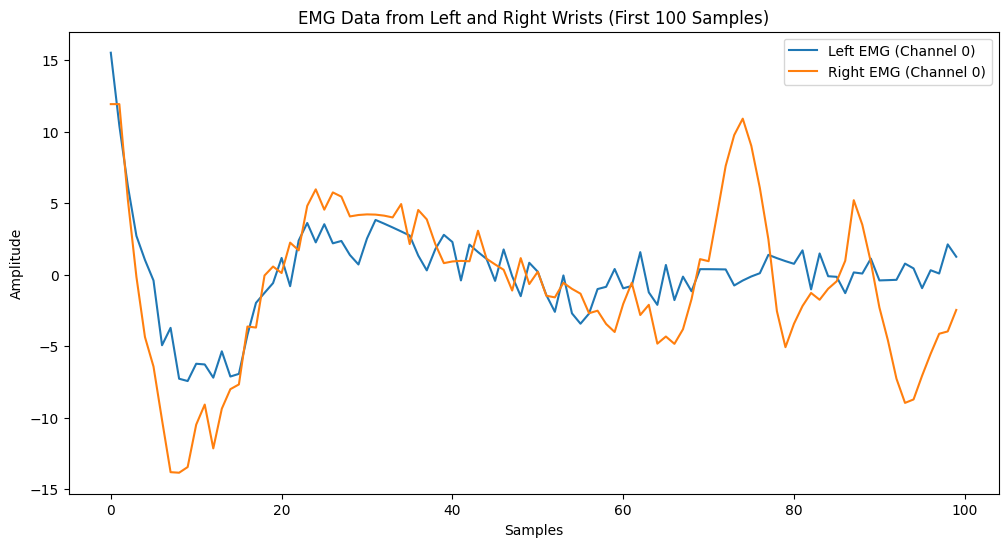

In [19]:

for file_path in hdf5_files:
    print(f"Processing file: {file_path}")

    # Create an EMGSessionData object
    emg_session = EMGSessionData(file_path)

    # Load the timeseries and metadata
    timeseries = emg_session.timeseries
    keystrokes = emg_session.metadata[EMGSessionData.KEYSTROKES]

    # Create a WindowedEMGDataset instance
    windowed_data = WindowedEMGDataset(
        hdf5_path=file_path,
        window_length=8000,  # Set your desired window length
        stride=None,  # Set the stride (or leave as None for no overlap)
        padding=(0, 0),  # Set padding if necessary
        jitter=False,  # Set jitter for randomness
        transform=ToTensor()  # Use the ToTensor transform
    )

    # Example: Iterate through the windowed EMG dataset
    for window, labels in windowed_data:
        # Each window is a tensor of EMG signals from the dataset
        print("EMG Window:", window)
        print("Labels:", labels)

    # Example: Process the keystrokes (label data)
    label_data = LabelData.from_keystrokes(keystrokes)
    print("Label Data:", label_data)

    # Optional: Visualize some of the data
    emg_left = timeseries[EMGSessionData.EMG_LEFT]
    emg_right = timeseries[EMGSessionData.EMG_RIGHT]

    plt.figure(figsize=(12, 6))
    plt.plot(emg_left[:100, 0], label="Left EMG (Channel 0)")  # Display first 100 samples of EMG from the left wrist
    plt.plot(emg_right[:100, 0], label="Right EMG (Channel 0)")  # Display first 100 samples of EMG from the right wrist
    plt.legend()
    plt.title("EMG Data from Left and Right Wrists (First 100 Samples)")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.show()


### 3.2. Normalization

Normalize the sEMG signals by channel.

In [ ]:
# Normalize each channel to zero mean and unit variance
def normalize_data(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return (data - mean) / std

# Normalize the filtered sEMG data
normalized_emg_data = normalize_data(filtered_emg_data)


## 4. Visualize the Raw and Processed sEMG Signals

Let's visualize the signals to ensure that the preprocessing is effective.

In [ ]:
# Visualize the raw and filtered sEMG signals from one of the channels
channel = 0  # Choose a channel to plot
time = np.arange(emg_data.shape[0]) / sampling_rate  # Time vector

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, emg_data[:, channel])
plt.title('Raw sEMG Signal (Channel 0)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(time, filtered_emg_data[:, channel])
plt.title('Filtered sEMG Signal (Channel 0)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


## 5. Extract Features (Optional)

You can extract additional features like RMS, zero-crossing rate, etc.

In [ ]:
# RMS Feature Extraction
def rms(data, window_size=100):
    return np.sqrt(np.mean(data**2, axis=0))

rms_features = rms(filtered_emg_data)

# Plot RMS features over time
plt.figure(figsize=(10, 5))
plt.plot(time[:len(rms_features)], rms_features)
plt.title('RMS of the Filtered sEMG Signal')
plt.xlabel('Time (s)')
plt.ylabel('RMS Amplitude')
plt.show()


## 6. Preparing the Data for Training

Since the input sEMG data and the ground-truth keystrokes may have different sequence lengths, we will need to prepare the data accordingly.

```python
# You can further split your data into training/validation sets, implement padding,
# and prepare the data for the CTC Loss function.

# Example of how to align data with CTC Loss:
# pad_sequences, encode the keystroke labels, and apply CTC loss preparation here.
```

